<a href="https://colab.research.google.com/github/jahnavibandaru2006-bot/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Prediction

 Bike Sharing Demand Prediction

This project aims to predict the number of bike rentals using historical usage data from a bike-sharing service. The dataset is provided by Kaggle’s "Bike Sharing Demand" competition.

We build a regression model to forecast demand based on features like weather, season, temperature, time of day, and more.

## 📊 Data Overview

The dataset contains hourly rental data from 2011 to 2012 in Washington, D.C. Each row represents an hour, with columns such as temperature, humidity, windspeed, and the actual rental count.

We perform feature extraction from the datetime column and build a machine learning model to predict the `count` of rentals.




In [12]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 2. Load the Dataset
df = pd.read_csv("hour.csv")   # upload hour.csv in the same folder
print("Dataset Loaded Successfully!")
df.head()



Dataset Loaded Successfully!


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
import zipfile

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall(".")   # extract to current folder

print("Extracted!")


Extracted!


In [10]:
import os
os.listdir()


['.config',
 'bike-sharing-dataset',
 '.ipynb_checkpoints',
 'archive.zip',
 'Readme.txt',
 'day.csv',
 'hour.csv',
 'sample_data']

In [11]:
# 3. Check Dataset Information
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# 4. Basic Cleaning (if needed)
# Drop columns not useful for ML
df = df.drop(['instant', 'dteday'], axis=1)

# Check missing values
df.isnull().sum()


,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [14]:
# 5. Feature Selection
X = df.drop(['cnt'], axis=1)   # input features
y = df['cnt']                  # target output (bike rentals)


In [15]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training Samples:", X_train.shape)
print("Testing Samples:", X_test.shape)


Training Samples: (13903, 14)
Testing Samples: (3476, 14)


In [16]:
# 7. Train Random Forest Model
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [17]:
# 8. Make Predictions
y_pred = model.predict(X_test)


In [18]:
# 9. Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("RMSE:", rmse)
print("R² Score:", r2)


Model Performance:
RMSE: 2.701270952411646
R² Score: 0.9997695635568788


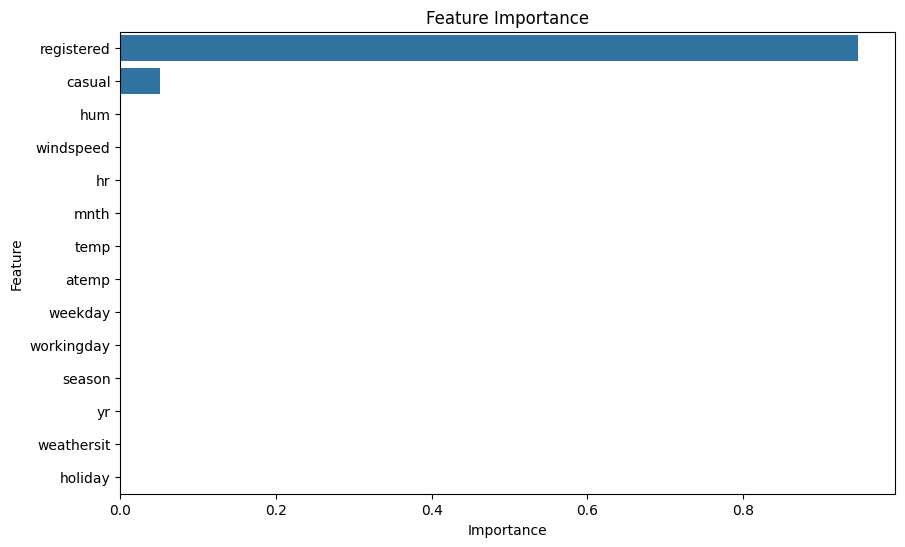

In [19]:
# 10. Feature Importance Visualization
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

feature_imp = feature_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title("Feature Importance")
plt.show()


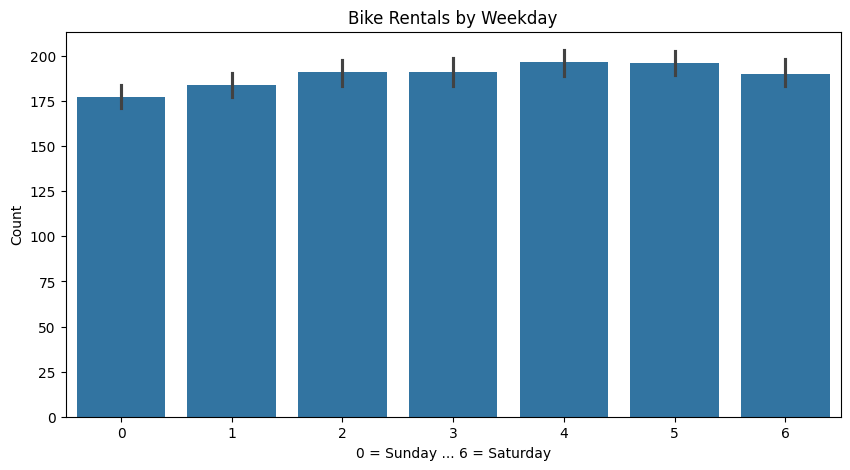

In [20]:
#Rentals by Weekday
plt.figure(figsize=(10,5))
sns.barplot(x='weekday', y='cnt', data=df)
plt.title("Bike Rentals by Weekday")
plt.xlabel("0 = Sunday ... 6 = Saturday")
plt.ylabel("Count")
plt.show()
